In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re
import sys
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

In [2]:
df = pd.read_csv('Bitcoin_tweets.csv', usecols = ['user_name','date', 'text', 'is_retweet', 'source'])

D:\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = df.astype({'user_name': 'str'})
df.drop_duplicates(subset ="user_name", keep = False, inplace = True)
df.drop(df[(df['is_retweet'] == 'TRUE')].index, inplace=True)
df

,user_name,date,text,source,is_retweet
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,Twitter Web App,False
12,CPUcoin,2021-02-10 23:50:59,Join our first virtual crypto meetup of 2021 -...,Twitter Web App,False
21,Crypto M🕶️stache ! 🇧🇪🇯🇴🇳🇱🇮🇪,2021-02-10 23:46:17,Forget all you know about #cryptocurrency \nTh...,Twitter for Android,False
29,Adriana Itzel,2021-02-10 23:42:22,Binance is the #1 crypto trading platform for ...,Twitter Web App,False
32,100UnitBets,2021-02-10 23:40:21,"We accept #Bitcoin, #BitcoinCash #Litecoin and...",Twitter Web App,False
...,...,...,...,...,...
2259714,Scottish Fold Token,2022-01-19 19:11:34,Please follow us on Instagram 📸\n\nhttps://t.c...,Twitter for Android,False
2259727,Buse Konmaz,2022-01-19 19:10:53,May be depth #BTC #BTCUSDT #BTCUSD #Bitcoin ht...,Twitter Web App,False
2259734,𝓜𝓪𝓼𝓽𝓮𝓻 𝓙𝓮𝓭𝓲,2022-01-19 19:10:34,🪙Gold ⬆️ #Btc ⬇️,Twitter for Android,False
2259775,Diarmuid MacDonald,2022-01-19 19:08:42,@crypto No need to market it - anyone who is i...,Twitter Web App,False


In [4]:
df = df.drop(['user_name','is_retweet'], axis = 1)
df.dropna()
df = df.astype({'text': 'str'})

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df.head(10000)

,date,text,source,clean_tweet
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,Twitter Web App,This network is secured by 9 508 nodes as of t...
12,2021-02-10 23:50:59,Join our first virtual crypto meetup of 2021 -...,Twitter Web App,Join our first virtual crypto meetup of 2021 -...
21,2021-02-10 23:46:17,Forget all you know about #cryptocurrency \nTh...,Twitter for Android,Forget all you know about #cryptocurrency \nTh...
29,2021-02-10 23:42:22,Binance is the #1 crypto trading platform for ...,Twitter Web App,Binance is the #1 crypto trading platform for ...
32,2021-02-10 23:40:21,"We accept #Bitcoin, #BitcoinCash #Litecoin and...",Twitter Web App,"We accept #Bitcoin, #BitcoinCash #Litecoin and..."
...,...,...,...,...
105020,2021-04-18 06:21:08,This is crypto!\n\n#bitcoin #btc #ripple #xrp ...,Twitter for iPhone,This is crypto!\n\n#bitcoin #btc #ripple #xrp ...
105025,2021-04-18 06:19:37,$DOGE get ready... about to breakout again. Th...,Twitter Web App,$DOGE get ready... about to breakout again. Th...
105050,2021-04-18 06:13:49,"#Bitcoin is down $10,000 in 1 day and took sup...",Twitter for Android,"#Bitcoin is down $10,000 in 1 day and took sup..."
105052,2021-04-18 06:12:37,ALL #CRYPTOCURRENCY #CRYPTO #CURRENCY #BITCOIN...,Twitter Web App,ALL #CRYPTOCURRENCY #CRYPTO #CURRENCY #BITCOIN...


In [6]:
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: x.lower())
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'https?:\/\/\S*', ' ', x))
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df = df[~df["source"].str.contains("bot", na=False)]
df = df[~df["source"].str.contains("nan", na=False)]

In [7]:
df['tweet_token'] =df['clean_tweet'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tweet_token_filtered'] =df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
df['tweet_stemmed']=df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['tweet_lemmatized']=df['tweet_stemmed'].apply(lambda x: ''.join([lemmatizing.lemmatize(i) for i in x]))
df.head()

,date,text,source,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,Twitter Web App,this network is secured by nodes as of t...,"[this, network, is, secured, by, nodes, as, of...","[network, secured, nodes, today, soon, biggest...",network secur node today soon biggest bear rec...,network secur node today soon biggest bear rec...
12,2021-02-10 23:50:59,Join our first virtual crypto meetup of 2021 -...,Twitter Web App,join our first virtual crypto meetup of ...,"[join, our, first, virtual, crypto, meetup, of...","[join, first, virtual, crypto, meetup, crypto,...",join first virtual crypto meetup crypto friday...,join first virtual crypto meetup crypto friday...
21,2021-02-10 23:46:17,Forget all you know about #cryptocurrency \nTh...,Twitter for Android,forget all you know about cryptocurrency the...,"[forget, all, you, know, about, cryptocurrency...","[forget, know, cryptocurrency, coins, listed, ...",forget know cryptocurr coin list nasdaq etf re...,forget know cryptocurr coin list nasdaq etf re...
29,2021-02-10 23:42:22,Binance is the #1 crypto trading platform for ...,Twitter Web App,binance is the crypto trading platform for ...,"[binance, is, the, crypto, trading, platform, ...","[binance, crypto, trading, platform, beginners...",binanc crypto trade platform beginn expert sign,binanc crypto trade platform beginn expert sign
32,2021-02-10 23:40:21,"We accept #Bitcoin, #BitcoinCash #Litecoin and...",Twitter Web App,we accept bitcoin bitcoincash litecoin and...,"[we, accept, bitcoin, bitcoincash, litecoin, a...","[accept, bitcoin, bitcoincash, litecoin, ether...",accept bitcoin bitcoincash litecoin ethereum a...,accept bitcoin bitcoincash litecoin ethereum a...


In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text_clean']=df['tweet_lemmatized'].apply(lambda x: remove_emoji(x))
df.head(1)

,date,text,source,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,text_clean
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,Twitter Web App,this network is secured by nodes as of t...,"[this, network, is, secured, by, nodes, as, of...","[network, secured, nodes, today, soon, biggest...",network secur node today soon biggest bear rec...,network secur node today soon biggest bear rec...,network secur node today soon biggest bear rec...


In [9]:
df['otext'] = df['text']
df['text']=df['text_clean']

In [10]:
for i in df['text']:
    analysis = TextBlob(i).sentiment
    #print(analysis) 

sentiment_objects = [TextBlob(tweet) for tweet in df['text']]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,-0.25,network secur node today soon biggest bear rec...
1,0.25,join first virtual crypto meetup crypto friday...
2,0.20,forget know cryptocurr coin list nasdaq etf re...
3,0.00,binanc crypto trade platform beginn expert sign
4,0.00,accept bitcoin bitcoincash litecoin ethereum a...


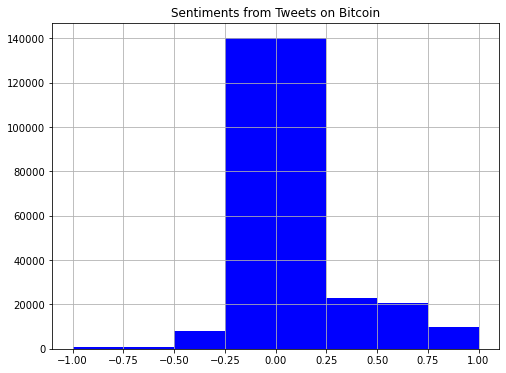

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Bitcoin")
plt.show()

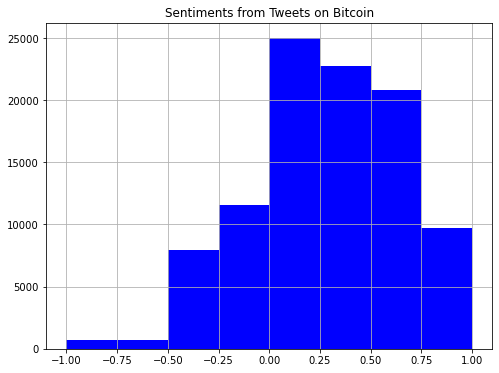

In [12]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Bitcoin")
plt.show()

In [13]:
df1 = pd.DataFrame()
df1['text']=df['text']
print(df1['text'])

4          network secur node today soon biggest bear rec...
12         join first virtual crypto meetup crypto friday...
21         forget know cryptocurr coin list nasdaq etf re...
29           binanc crypto trade platform beginn expert sign
32         accept bitcoin bitcoincash litecoin ethereum a...
                                 ...                        
2259714    pleas follow us instagram btc bnb eth blockcha...
2259727                 may depth btc btcusdt btcusd bitcoin
2259734                                             gold btc
2259775    need market anyon interest alreadi know social...
2259782    send bitcoin take min show expens send btc kno...
Name: text, Length: 202756, dtype: object


In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df1['TextBlob_Subjectivity'] = df1['text'].apply(getSubjectivity)
df1['TextBlob_Polarity'] = df1['text'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return '-1'
    elif score == 0:
        return '0'
    else:
        return '+1'
df1['TextBlob_Analysis'] = df1['TextBlob_Polarity'].apply(getAnalysis)
print(df1['TextBlob_Analysis'])

4          -1
12         +1
21         +1
29          0
32          0
           ..
2259714     0
2259727     0
2259734     0
2259775    +1
2259782    +1
Name: TextBlob_Analysis, Length: 202756, dtype: object


In [15]:
df['score']= df1['TextBlob_Analysis']

In [16]:
df

,date,text,source,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,text_clean,otext,score
4,2021-02-10 23:54:06,network secur node today soon biggest bear rec...,Twitter Web App,this network is secured by nodes as of t...,"[this, network, is, secured, by, nodes, as, of...","[network, secured, nodes, today, soon, biggest...",network secur node today soon biggest bear rec...,network secur node today soon biggest bear rec...,network secur node today soon biggest bear rec...,This network is secured by 9 508 nodes as of t...,-1
12,2021-02-10 23:50:59,join first virtual crypto meetup crypto friday...,Twitter Web App,join our first virtual crypto meetup of ...,"[join, our, first, virtual, crypto, meetup, of...","[join, first, virtual, crypto, meetup, crypto,...",join first virtual crypto meetup crypto friday...,join first virtual crypto meetup crypto friday...,join first virtual crypto meetup crypto friday...,Join our first virtual crypto meetup of 2021 -...,+1
21,2021-02-10 23:46:17,forget know cryptocurr coin list nasdaq etf re...,Twitter for Android,forget all you know about cryptocurrency the...,"[forget, all, you, know, about, cryptocurrency...","[forget, know, cryptocurrency, coins, listed, ...",forget know cryptocurr coin list nasdaq etf re...,forget know cryptocurr coin list nasdaq etf re...,forget know cryptocurr coin list nasdaq etf re...,Forget all you know about #cryptocurrency \nTh...,+1
29,2021-02-10 23:42:22,binanc crypto trade platform beginn expert sign,Twitter Web App,binance is the crypto trading platform for ...,"[binance, is, the, crypto, trading, platform, ...","[binance, crypto, trading, platform, beginners...",binanc crypto trade platform beginn expert sign,binanc crypto trade platform beginn expert sign,binanc crypto trade platform beginn expert sign,Binance is the #1 crypto trading platform for ...,0
32,2021-02-10 23:40:21,accept bitcoin bitcoincash litecoin ethereum a...,Twitter Web App,we accept bitcoin bitcoincash litecoin and...,"[we, accept, bitcoin, bitcoincash, litecoin, a...","[accept, bitcoin, bitcoincash, litecoin, ether...",accept bitcoin bitcoincash litecoin ethereum a...,accept bitcoin bitcoincash litecoin ethereum a...,accept bitcoin bitcoincash litecoin ethereum a...,"We accept #Bitcoin, #BitcoinCash #Litecoin and...",0
...,...,...,...,...,...,...,...,...,...,...,...
2259714,2022-01-19 19:11:34,pleas follow us instagram btc bnb eth blockcha...,Twitter for Android,please follow us on instagram btc bnb ...,"[please, follow, us, on, instagram, btc, bnb, ...","[please, follow, us, instagram, btc, bnb, eth,...",pleas follow us instagram btc bnb eth blockcha...,pleas follow us instagram btc bnb eth blockcha...,pleas follow us instagram btc bnb eth blockcha...,Please follow us on Instagram 📸\n\nhttps://t.c...,0
2259727,2022-01-19 19:10:53,may depth btc btcusdt btcusd bitcoin,Twitter Web App,may be depth btc btcusdt btcusd bitcoin,"[may, be, depth, btc, btcusdt, btcusd, bitcoin]","[may, depth, btc, btcusdt, btcusd, bitcoin]",may depth btc btcusdt btcusd bitcoin,may depth btc btcusdt btcusd bitcoin,may depth btc btcusdt btcusd bitcoin,May be depth #BTC #BTCUSDT #BTCUSD #Bitcoin ht...,0
2259734,2022-01-19 19:10:34,gold btc,Twitter for Android,gold btc,"[gold, btc]","[gold, btc]",gold btc,gold btc,gold btc,🪙Gold ⬆️ #Btc ⬇️,0
2259775,2022-01-19 19:08:42,need market anyon interest alreadi know social...,Twitter Web App,no need to market it anyone who is interest...,"[no, need, to, market, it, anyone, who, is, in...","[need, market, anyone, interested, already, kn...",need market anyon interest alreadi know social...,need market anyon interest alreadi know social...,need market anyon interest alreadi know social...,@crypto No need to market it - anyone who is i...,+1


In [17]:
df.to_csv('Bitcoin_tweets2.csv')

In [18]:
selected_columns = df[["tweet_lemmatized"]]
tweet = selected_columns.copy()
tweet = tweet.rename({"tweet_lemmatized":"text"}, axis='columns')
tweet.head()

,text
4,network secur node today soon biggest bear rec...
12,join first virtual crypto meetup crypto friday...
21,forget know cryptocurr coin list nasdaq etf re...
29,binanc crypto trade platform beginn expert sign
32,accept bitcoin bitcoincash litecoin ethereum a...


In [19]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)
#keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = len(tweet.index)
#api = tweepy.API(auth, wait_on_rate_limit=True)
#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in tweet['text']:
    
    #print(tweet.text)
    tweet_list.append(i)
    analysis = TextBlob(i)
    score = SentimentIntensityAnalyzer().polarity_scores(i)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(i)
        negative += 1
    elif pos > neg:
        positive_list.append(i)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(i)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [20]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  202756
positive number:  99780
negative number:  24110
neutral number:  78866


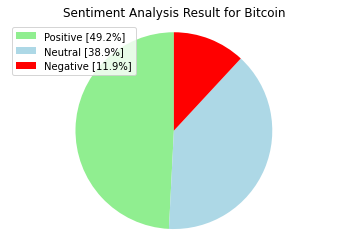

In [21]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['lightgreen', 'lightblue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for Bitcoin')
plt.axis('equal')
plt.show()

In [22]:
x= df.iloc[33:34, :]
print("This is the original text:")
print(x['otext'].values[0])
print('\n')
print("Cleaned text after removing hashtags and usernames:")
print(x['clean_tweet'].values[0])
print('\n')
print("Tokenized tweet:")
print(x['tweet_token'].values[0])
print('\n')
print("Tokenized tweet after filtering:")
print(x['tweet_token_filtered'].values[0])
print('\n')
print("Stemming:")
print(x['tweet_stemmed'].values[0])
print('\n')
print("Lemmatizing:")
print(x['tweet_lemmatized'].values[0])

This is the original text:
@gegelsmr I like what I see when I look around 👋💎🙌🚀❤ #bitcoin #btc


Cleaned text after removing hashtags and usernames:
 i like what i see when i look around        bitcoin  btc


Tokenized tweet:
['i', 'like', 'what', 'i', 'see', 'when', 'i', 'look', 'around', 'bitcoin', 'btc']


Tokenized tweet after filtering:
['like', 'see', 'look', 'around', 'bitcoin', 'btc']


Stemming:
like see look around bitcoin btc


Lemmatizing:
like see look around bitcoin btc


In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
testbow_lemm = bow_vectorizer.fit_transform(test['tweet_lemmatized'])
testbow_lemm.toarray()
bow_vectorizer
# bag-of-words feature matrix -
trainbow_stem = bow_vectorizer.fit_transform(train['tweet_stemmed'])
trainbow_stem
trainbow_stem.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
trainbow_lemm = bow_vectorizer.fit_transform(train['tweet_lemmatized'])
trainbow_lemm.toarray()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [26]:
traintfidf_stem = tfidf_vectorizer.fit_transform(train['tweet_stemmed'])
traintfidf_stem.toarray()
traintfidf_lemm = tfidf_vectorizer.fit_transform(train['tweet_lemmatized'])
traintfidf_lemm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer
testbow_stem = bow_vectorizer.fit_transform(test['tweet_stemmed'])
testbow_stem.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
testbow_lemm = bow_vectorizer.fit_transform(test['tweet_lemmatized'])
testbow_lemm.toarray()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [29]:
testtfidf_stem = tfidf_vectorizer.fit_transform(test['tweet_stemmed'])
testtfidf_stem.toarray()
testtfidf_lemm = tfidf_vectorizer.fit_transform(test['tweet_lemmatized'])
testtfidf_lemm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
X1=traintfidf_lemm
y1=train['score']

In [32]:
x1train,x1test,y1train,y1test=train_test_split(X1,y1,test_size=.3,random_state=42)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
cv = KFold(n_splits=10, random_state=1, shuffle=True)
lr1=LogisticRegression()


In [42]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
scoring = ['precision_macro', 'recall_macro','accuracy','f1_macro']
scores = cross_validate(lr1, X1, y1,scoring=scoring, cv=cv, n_jobs=-1)
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('F1 macro : %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))

Precision: 0.930 (0.003)
Recall: 0.848 (0.004)
Accuracy: 0.917 (0.002)
F1 macro : 0.880 (0.004)


In [43]:
svc1=SVC()
scores = cross_validate(svc1, X1, y1,scoring=scoring, cv=cv, n_jobs=-1)
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('F1 macro : %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))

Precision: 0.929 (0.003)
Recall: 0.856 (0.004)
Accuracy: 0.920 (0.002)
F1 macro : 0.885 (0.004)


In [44]:
tokenized_tweet=df['text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

4     [network, secur, node, today, soon, biggest, b...
12    [join, first, virtual, crypto, meetup, crypto,...
21    [forget, know, cryptocurr, coin, list, nasdaq,...
29    [binanc, crypto, trade, platform, beginn, expe...
32    [accept, bitcoin, bitcoincash, litecoin, ether...
Name: text, dtype: object

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv1 = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv1.fit_transform(df['text'].values.astype('U'))

In [46]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [47]:
cnb = ComplementNB()
scores = cross_validate(cnb, X1, y1,scoring=scoring, cv=cv, n_jobs=-1)
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('F1 macro : %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))

Precision: 0.755 (0.003)
Recall: 0.772 (0.003)
Accuracy: 0.805 (0.002)
F1 macro : 0.762 (0.003)


In [48]:
#train_X, val_X, train_y, val_y = train_test_split(X1, y1,test_size = 0.20,random_state = 42)
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

#forest_model = RandomForestRegressor(n_estimators= 1000, random_state=42)
#forest_model.fit(train_X, train_y)
#melb_preds = forest_model.predict(val_X)
#print(accuracy_score(val_y, melb_preds))
#print(confusion_matrix(predict_lr1,y1test))
#print(classification_report(melb_preds,val_y))
df.to_csv('Bitcointweets3.csv')

In [49]:
labels = df['score']
dfi = df['text']
from sklearn.model_selection import train_test_split
import numpy as np
# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(dfi, labels, test_size = 0.20, random_state = 42)
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100, random_state=42,verbose=1)
# Train the model on training data
scores = cross_validate(rf, X1, y1,scoring=scoring, cv=cv, n_jobs=-1)
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('F1 macro : %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))

Precision: 0.926 (0.003)
Recall: 0.850 (0.004)
Accuracy: 0.917 (0.002)
F1 macro : 0.880 (0.003)


In [50]:
from sklearn.tree import DecisionTreeClassifier
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X1_train,y1_train)
scores = cross_validate(clf, X1, y1,scoring=scoring, cv=cv, n_jobs=-1)
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('F1 macro : %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))

Precision: 0.834 (0.003)
Recall: 0.823 (0.004)
Accuracy: 0.876 (0.002)
F1 macro : 0.829 (0.003)


In [ ]:
import pickle
#pickle.dump(clf, open('dectree.sav', 'wb'))
#pickle.dump(rf, open('rf.sav', 'wb'))
#pickle.dump(cnb, open('cnb.sav', 'wb'))
#pickle.dump(svc1, open('svc.sav', 'wb'))
#pickle.dump(lr1, open('lr.sav', 'wb'))
#pickle.dump(tfidf_vectorizer, open('tfidf.sav', 'wb'))
#pickle.dump(bow_vectorizer, open('bow.sav', 'wb'))
#pickle.dump(cv,open('cv.sav','wb'))